In [28]:
import pandas as pd
import numpy as np
from safegraph_py_functions import safegraph_py_functions as sgpy
import os
from dotenv import load_dotenv, find_dotenv
from loguru import logger

In [3]:
pd.options.display.max_columns = 999

In [4]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)
os.chdir(os.environ.get("ROOT_DIR"))
from src import DATA_DIR
raw_data_dir = DATA_DIR / 'raw'

In [5]:
# if import is 0 it reads the data from the existing file
# otherwise reads in the raw data an makes a unified dataset
IMPORT = 0 

In [6]:
# Read in all patterns files in the monthly-patterns folder
def get_files():
    patterns_path = raw_data_dir / "monthly-patterns"
    files = []
    for f in patterns_path.glob("**/*.csv.gz"):
        files.append(f)
    return files

In [7]:
def filter_to_philly(df):
    # zip codes are read as integers rather than strings so we add leading zeros.
    # this is not strictly necessary since Philadelphia zipcodes don't have leading zeros.
    
    # Philadelphia selection
    # HK: adding leading zeros because some zipcodes in MA are 0191X.
    df['postal_code'] = df['postal_code'].apply(lambda x: ('00000'+str(x))[-5:])
    in_philly = df['postal_code'].astype(str).str.startswith("191")
    df = df.loc[in_philly]
    df = df[['safegraph_place_id','date_range_start','postal_code', 
             'raw_visit_counts', 'raw_visitor_counts']]
    
    return df

In [8]:
if IMPORT == 1:
    philly_patterns = []
    files = get_files()
    for i, f in enumerate(files):
        print(f)
        philly_patterns.append(filter_to_philly(pd.read_csv(f)))
    philly_patterns = pd.concat(philly_patterns)
    philly_patterns.to_csv(
        DATA_DIR / "processed" / "kmeans_patterns.csv.tar.gz", index=False
    )
else:
    philly_patterns_all = pd.read_csv(
        DATA_DIR / "processed" / "philly_patterns.csv.tar.gz", low_memory=False
    )

In [9]:
philly_patterns_all.head()

,placekey_x,safegraph_place_id,location_name_x,street_address_x,city_x,region_x,postal_code_x,safegraph_brand_ids_x,brands_x,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,parent_safegraph_place_id,location_name_y,safegraph_brand_ids_y,brands_y,top_category,sub_category,naics_code,latitude,longitude,street_address_y,city_y,region_y,postal_code_y,iso_country_code,phone_number,open_hours,category_tags,valid_to,valid_from,placekey_y,opened_on,closed_on,tracking_opened_since,tracking_closed_since,placekey
0,zzw-228@628-pmb-7t9,sg:26825b56c5ce4c7d91afdc71a7c34440,Provident Technology,1315 Walnut St Ste 905,Philadelphia,PA,19107,NaN,NaN,2020-10-01,2020-11-01T00:00:00-04:00,7,7,"[0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",4.210100e+11,{},"{""421010021002"":4,""421010024003"":4}",{},"{""US"":6}",4783.0,8.0,"{""<5"":2,""5-20"":2,""21-60"":0,""61-240"":0,"">240"":3}",{},"{""Dunkin'"":39,""Starbucks"":35,""McDonald's"":28,""...","[1,1,1,1,1,0,0,0,0,1,2,3,2,2,3,2,2,1,0,0,1,1,2,1]","{""Monday"":1,""Tuesday"":2,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}",NaN,Provident Technology,NaN,NaN,Electronics and Appliance Stores,Electronics Stores,443142.0,39.949304,-75.163015,1315 Walnut St Ste 905,Philadelphia,PA,19107.0,US,NaN,"{ ""Mon"": [[""8:00"", ""18:00""]], ""Tue"": [[""8:00"",...",NaN,2020-10-19,2020-09-08,zzw-228@628-pmb-7t9,NaN,NaN,NaN,NaN,NaN
1,22x-222@628-phy-4qf,sg:32b17bf96a93444588131370e52d310d,Los Potrillos Mexican Restaurant,4653 Rising Sun Ave,Philadelphia,PA,19140,NaN,NaN,2020-10-01,2020-11-01T00:00:00-04:00,168,96,"[9,8,3,3,6,6,5,3,7,5,5,2,6,9,8,6,5,2,8,6,5,2,4...",4.210103e+11,"{""421010288001"":11,""421010330006"":4,""421010287...","{""421010288001"":11,""420454107003"":4,""421010305...",{},"{""US"":87}",3335.0,19.5,"{""<5"":8,""5-20"":78,""21-60"":28,""61-240"":37,"">240...","{""Dunkin'"":21,""AAMCO Transmissions"":20,""Family...","{""Dunkin'"":42,""Sunoco"":35,""Wawa"":35,""Dollar Tr...","[7,6,5,6,7,8,11,11,12,18,20,28,28,24,35,30,36,...","{""Monday"":20,""Tuesday"":23,""Wednesday"":22,""Thur...","{""android"":60,""ios"":35}",NaN,Los Potrillos Mexican Restaurant,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511.0,40.021333,-75.125779,4653 Rising Sun Ave,Philadelphia,PA,19140.0,US,1.267323e+10,NaN,Mexican Food,2020-10-19,2020-09-08,22x-222@628-phy-4qf,NaN,NaN,NaN,NaN,NaN
2,238-222@628-pj5-3nq,sg:3f4865e8bbb249838350eee9a101c8eb,Precious Babies Learning Academy Day Car,1433 W Erie Ave,Philadelphia,PA,19140,NaN,NaN,2020-10-01,2020-11-01T00:00:00-04:00,75,47,"[2,1,4,1,2,2,4,2,6,1,8,2,3,2,4,2,4,1,3,1,4,1,3...",4.210102e+11,"{""421010002001"":4,""421010202005"":4,""4210102750...","{""421010364001"":5,""421010204003"":4,""4210103100...",{},"{""US"":32}",5626.0,28.0,"{""<5"":5,""5-20"":30,""21-60"":16,""61-240"":14,"">240...","{""McDonald's"":46,""Chick-fil-A"":14}","{""Dunkin'"":37,""Sunoco"":36,""Rite Aid"":25,""Wawa""...","[6,6,4,4,3,2,3,4,7,9,14,13,11,13,14,12,10,11,1...","{""Monday"":9,""Tuesday"":8,""Wednesday"":12,""Thursd...","{""android"":29,""ios"":15}",NaN,Precious Babies Learning Academy Day Car,NaN,NaN,Child Day Care Services,Child Day Care Services,624410.0,40.009669,-75.152732,1433 W Erie Ave,Philadelphia,PA,19140.0,US,1.215221e+10,NaN,NaN,2020-10-19,2020-09-08,238-222@628-pj5-3nq,NaN,NaN,NaN,NaN,NaN
3,23z-222@628-phy-rc5,sg:76dbefabe6eb465fac98e62c2fb15be9,TABU hookah lounge,4535 N 5th St,Philadelphia,PA,19140,NaN,NaN,2020-10-01,2020-11-01T00:00:00-04:00,322,234,"[3,16,12,15,9,4,13,2,8,18,11,8,10,9,9,11,16,17...",4.210103e+11,"{""421010287001"":7,""421010188001"":6,""4210103380...","{""421010197002"":7,""421010098021"":6,""4210103160...",{},"{""US"":211}",6166.0,51.5,"{""<5"":11,""5-20"":91,""21-60"

Number of unique safegraph ids:

In [10]:
philly_patterns_all['safegraph_place_id'].nunique()

20624

Get POIs with category info:

In [11]:
categories = (
    philly_patterns_all.dropna(subset=["top_category"])
    .drop_duplicates(subset=["safegraph_place_id", "top_category"])
    .sort_values("date_range_start", ascending=False)
    .drop_duplicates(subset=["safegraph_place_id"])
)[["safegraph_place_id", "top_category"]]

In [12]:
categories.head()

,safegraph_place_id,top_category
0,sg:26825b56c5ce4c7d91afdc71a7c34440,Electronics and Appliance Stores
11673,sg:c640e5922168451fa7b1233c3d36b506,Grocery Stores
11311,sg:46c9a4ccc34c419f905d202104794631,Drinking Places (Alcoholic Beverages)
11312,sg:48c97ce66d664faf85919c67867a0969,Offices of Dentists
11313,sg:5f1b861e5b8644e7895bf1a7baccbb16,Personal Care Services


Number of POI with category info:

In [13]:
categories['safegraph_place_id'].nunique()

19647

Merge in category info and drop those without a category:

In [14]:
philly_patterns = philly_patterns_all.drop(labels=["top_category"], axis=1).merge(
    categories, on="safegraph_place_id"
)

No more missing categories:

In [15]:
philly_patterns['top_category'].isnull().sum()

0

Trim to the columns we need:

In [17]:
philly_patterns = philly_patterns[
    [
        "safegraph_place_id",
        "date_range_start",
        "date_range_end",
        "raw_visit_counts",
        "raw_visitor_counts",
        "poi_cbg",
        "top_category",
    ]
]

Make datetime columns:

In [18]:
philly_patterns["date_range_start"] = pd.to_datetime(
    philly_patterns["date_range_start"].astype(str).apply(lambda x: x[:10])
)

philly_patterns["date_range_end"] = pd.to_datetime(
    philly_patterns["date_range_end"].astype(str).apply(lambda x: x[:10])
)

In [422]:
# philly_patterns["poi_cbg"] = philly_patterns["poi_cbg"].astype(int)

In [423]:
# census_path = DATA_DIR / 'raw' / 'open-census-data'
# files = [file for file in census_path.glob('**/cbg_b19.csv')]
# census = pd.read_csv(files[0])
# census =  census[['census_block_group','B19013e1']]

In [424]:
# philly_patterns = philly_patterns.merge(census, left_on = 'poi_cbg', right_on = 'census_block_group', how = 'left')
# philly_patterns.drop(columns = 'census_block_group', inplace = True)

In [425]:
# philly_patterns['income_missing'] = philly_patterns['B19013e1'].isna().astype(int)
# philly_patterns['B19013e1'].fillna(value=philly_patterns['B19013e1'].mean(), inplace=True)

In [19]:
# for files with information disaggregated at the state level, keep only the country-wide info
def keep_total_level(norm_stats):
    if "region" in norm_stats.columns:
        if len(norm_stats[norm_stats["region"] == "ALL_STATES"]) == 0:
            raise ValueError('no region named "ALL_STATES"')
        norm_stats = norm_stats[norm_stats["region"] == "ALL_STATES"]
        norm_stats = norm_stats.drop(columns=["region"])
    return norm_stats


patterns_path = raw_data_dir / "monthly-patterns-2020-12"


norm_files = [f for f in patterns_path.glob("**/normalization_stats.csv")]
# read in normalization data
norm_stats = pd.concat([keep_total_level(pd.read_csv(file)) for file in norm_files])
norm_stats["year"] = norm_stats["year"].astype(int)
norm_stats["month"] = norm_stats["month"].astype(int)
norm_stats["day"] = norm_stats["day"].astype(int)
# HK: I only downloaded patterns data from 2019 onwards due to memory constraints
norm_stats = norm_stats[norm_stats["year"] >= 2019]
norm_stats.reset_index(inplace=True, drop=True)

In [20]:
norm_stats.head()

,year,month,day,total_visits,total_devices_seen,total_home_visits,total_home_visitors
0,2019,3,1,71494424,20818199,29867861,17558627
1,2019,3,2,64944421,20621293,28759442,17376856
2,2019,3,3,57808859,20708026,30021148,18297714
3,2019,3,4,66366221,20974271,30616720,18126681
4,2019,3,5,66513792,20246899,29591990,17466477


In [21]:
norm_stats["date"] = pd.to_datetime(
    (norm_stats.year * 10000 + norm_stats.month * 100 + norm_stats.day).apply(str),
    format="%Y%m%d",
)

In [22]:
date_ranges = (
    philly_patterns[["date_range_start", "date_range_end"]]
    .drop_duplicates()
    .sort_values("date_range_start")
    .reset_index(drop=True)
    .dropna()
)

In [23]:
date_ranges

,date_range_start,date_range_end
0,2019-01-01,2019-02-01
1,2019-02-01,2019-03-01
2,2019-03-01,2019-04-01
3,2019-04-01,2019-05-01
4,2019-05-01,2019-06-01
5,2019-06-01,2019-07-01
6,2019-07-01,2019-08-01
7,2019-08-01,2019-09-01
8,2019-09-01,2019-10-01
9,2019-10-01,2019-11-01


In [26]:
def get_date_range(x): 
    mask = (date_ranges['date_range_start'] <= x) & (date_ranges['date_range_end'] > x)
    if np.any(mask):
        return date_ranges.loc[mask,'date_range_start'].values[0]
    else:
        return np.nan

In [29]:
norm_stats['date_range_start'] = norm_stats.date.apply(get_date_range)

In [31]:
norm_stats[['date', 'date_range_start']].drop_duplicates()

,date,date_range_start
0,2019-03-01,2019-03-01
1,2019-03-02,2019-03-01
2,2019-03-03,2019-03-01
3,2019-03-04,2019-03-01
4,2019-03-05,2019-03-01
...,...,...
785,2020-12-27,NaT
786,2020-12-28,NaT
787,2020-12-29,NaT
788,2020-12-30,NaT


In [32]:
norm_stats = norm_stats[['date_range_start', 'total_visits', 'total_devices_seen']].groupby('date_range_start').agg('sum').reset_index()

In [33]:
philly_patterns = philly_patterns.merge(norm_stats, on="date_range_start")
philly_patterns["visit_count_norm"] = (
    1000000 * philly_patterns["raw_visit_counts"] / philly_patterns["total_visits"]
)
philly_patterns["visitor_count_norm"] = (
    1000000
    * philly_patterns["raw_visitor_counts"]
    / philly_patterns["total_devices_seen"]
)

In [34]:
philly_patterns.head()

,safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,poi_cbg,top_category,total_visits,total_devices_seen,visit_count_norm,visitor_count_norm
0,sg:26825b56c5ce4c7d91afdc71a7c34440,2020-10-01,2020-11-01,7,7,4.210100e+11,Electronics and Appliance Stores,1690871858,549983886,0.004140,0.012728
1,sg:32b17bf96a93444588131370e52d310d,2020-10-01,2020-11-01,168,96,4.210103e+11,Restaurants and Other Eating Places,1690871858,549983886,0.099357,0.174551
2,sg:3f4865e8bbb249838350eee9a101c8eb,2020-10-01,2020-11-01,75,47,4.210102e+11,Child Day Care Services,1690871858,549983886,0.044356,0.085457
3,sg:76dbefabe6eb465fac98e62c2fb15be9,2020-10-01,2020-11-01,322,234,4.210103e+11,Drinking Places (Alcoholic Beverages),1690871858,549983886,0.190434,0.425467
4,sg:9b2b12ebfa7745b6814873b7c1cef76b,2020-10-01,2020-11-01,93,46,4.210102e+11,Restaurants and Other Eating Places,1690871858,549983886,0.055001,0.083639


#### Tests

In [35]:
philly_patterns.top_category.value_counts().head(n=20)

Restaurants and Other Eating Places                     77301
Religious Organizations                                 20480
Child Day Care Services                                 19859
Grocery Stores                                          17955
Personal Care Services                                  13427
Other Amusement and Recreation Industries               13152
Automotive Repair and Maintenance                       12888
Elementary and Secondary Schools                        11240
Offices of Physicians                                   10886
Health and Personal Care Stores                         10831
Drinking Places (Alcoholic Beverages)                    9129
Museums, Historical Sites, and Similar Institutions      9089
Clothing Stores                                          6968
Offices of Dentists                                      6753
Offices of Other Health Practitioners                    6082
Sporting Goods, Hobby, and Musical Instrument Stores     5000
Gasoline

Let's check restaurants:

In [36]:
restaurants = philly_patterns.query(
    "top_category == 'Restaurants and Other Eating Places'"
)

<AxesSubplot:xlabel='date_range_start'>

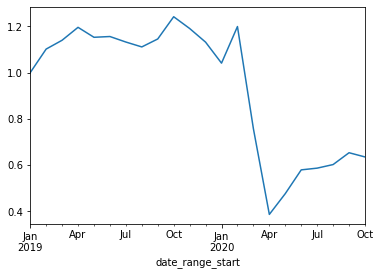

In [37]:
X = restaurants.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

<AxesSubplot:xlabel='date_range_start'>

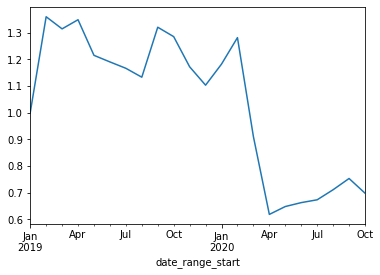

In [38]:
X = restaurants.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

Let's check grocery stores:

In [39]:
grocery_stores = philly_patterns.query("top_category == 'Grocery Stores'")

<AxesSubplot:xlabel='date_range_start'>

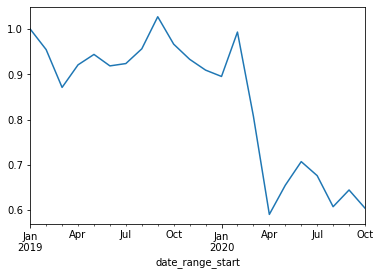

In [40]:
X = grocery_stores.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

**Note: "visit_count_norm" seems weird!**

<AxesSubplot:xlabel='date_range_start'>

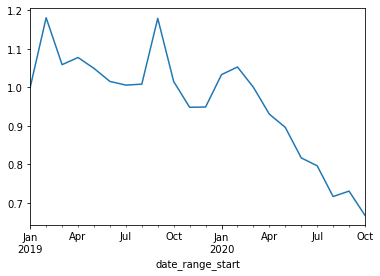

In [41]:
X = grocery_stores.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

#### Analysis

In [42]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
prepandemic = philly_patterns.loc[mask].copy()
pandemic = philly_patterns.loc[~mask].copy()

In [43]:
prepandemic.date_range_start.unique()

array(['2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [45]:
def cut_outliers(df, cols):
    for col in cols:
        ub = 2*df[col].quantile(0.99)
        mask = df[col] > ub
        df.loc[mask,col] = ub
    return df

def make_dummies(df, cols):
    return pd.get_dummies(df)
    

def Stdrshp(df, pivot_cols, constant_cols): 
    constant = df.loc[
        df.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id']+constant_cols
    ]
    constant.set_index('safegraph_place_id', inplace = True)
    #constant = make_dummies(constant, pivot_cols)
    pivoted = df.pivot_table(index='safegraph_place_id',columns='date_range_start')[pivot_cols]
    new_cols = [('{1} {0}'.format(*tup)) for tup in pivoted.columns]
    pivoted.columns = new_cols
    df = pivoted.join(constant)
    df = df.fillna(0)
    scaled = StandardScaler().fit_transform(df)
    scaled_features_df = pd.DataFrame(scaled, index=df.index, columns=df.columns)
    return scaled_features_df

def make_clusters(df, k = 5):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(df) # NH NOTE: USE HIGHER N_INIT TO AVOID RANDOMNESS
    df['cluster'] = kmeans.labels_
    return (df, kmeans.inertia_)

def run_Kmeans(df, pivot_cols, constant_cols, k = 5):
    normalized = Stdrshp(cut_outliers(df, pivot_cols), pivot_cols, constant_cols)
    return make_clusters(normalized, k)

In [46]:
pivot_cols = ["visitor_count_norm"] ## NH NOTE: try using visitor_count_norm only
constant_cols = []  #'B19013e1','income_missing']

In [47]:
import matplotlib.pyplot as plt

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


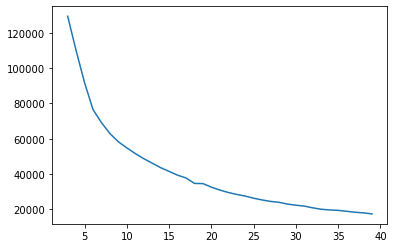

In [48]:
scaled = Stdrshp(philly_patterns, pivot_cols, constant_cols)
n_clusters = [k for k in range(3,40)]
inertias = []
for k in n_clusters:
    print(k)
    df, inertia = make_clusters(scaled, k = k)
    inertias.append(inertia)
    
plt.plot(n_clusters,inertias)

In [50]:
from kneed import KneeLocator

In [51]:
# Initialize the knee algorithm
kn = KneeLocator(n_clusters, inertias, curve='convex', direction='decreasing')

In [52]:
OPTIMAL_CLUSTERS = kn.knee
OPTIMAL_CLUSTERS

11

In [53]:
philly_patterns_clustered, pandemic_inertia = run_Kmeans(
    philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
)

In [54]:
# prepandemic, prepandemic_inertia = run_Kmeans(
#     prepandemic, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )
# pandemic, pandemic_inertia = run_Kmeans(
#     philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )

In [55]:
combined = philly_patterns_clustered.copy()

In [64]:
combined[['cluster']].to_csv(DATA_DIR / 'processed' / 'sg_clusters.csv', index = True)

In [56]:
# # We want to compare pandemic_inertia to the inertia we would have in 2020 if we used the
# # 2019 clustering
# combined = pandemic.join(prepandemic[['cluster']], how='left',rsuffix='pre')
# combined[['clusterpre']] = combined[['clusterpre']].fillna(value=-1)
# combined['clusterpre'] = combined['clusterpre'].astype(int)

In [57]:
cols = combined.columns
cols = cols[:-2]
n = len(combined.columns)

In [58]:
def get_inertia(df, cols, cluster_col):
    mask = df[cluster_col] > -1
    n = len(df.index)
    filtered = df[mask]
    m = len(filtered.index)
    se = ((df[cols] - df.groupby(cluster_col)[cols].transform('mean'))**2).to_numpy().sum()
    return se*(n/m)

get_inertia(combined, cols, 'cluster')

68346.84202125955

In [59]:
#worst case scenario
combined['newcol'] = 1
get_inertia(combined, cols, 'newcol')

412587.0

In [492]:
combined.groupby('cluster').size()

cluster
0     10650
1       178
2      5633
3        56
4       199
5      2297
6       566
7       505
8        53
9        62
10       16
dtype: int64

In [493]:
# combined.groupby('clusterpre').size()

**NH**: Plot the mean value over time by cluster

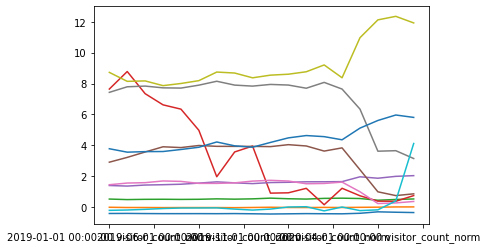

In [60]:
fig, ax = plt.subplots()
for cluster_num in combined['cluster'].unique():
    cluster = combined.query(f"cluster == {cluster_num}")
    cluster[cluster.columns[:-6]].T.mean(axis=1).plot(ax=ax, legend=False)

**NH:** seems like it sort of worked in terms of differentiating both by overall foot traffic and the shape of the traffic over time

In [312]:
big_cats = philly_patterns.groupby('top_category').size().sort_values(ascending = False)[:5]

In [313]:
big_cats = big_cats.index

In [314]:
def category_groups(x):
    if x in big_cats: 
        return x 
    else: 
        return 'other'

In [315]:
philly_patterns['top_category_simple'] = philly_patterns.top_category.apply(category_groups)

In [316]:
philly_patterns['top_category_simple'].unique()

array(['Grocery Stores', 'other', 'Restaurants and Other Eating Places',
       'Child Day Care Services', 'Personal Care Services',
       'Religious Organizations'], dtype=object)

In [324]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
cats = philly_patterns.loc[~mask,].copy()
cats = cats.loc[
        cats.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id', 'top_category_simple']
    ]

In [325]:
# combined.drop(columns = 'top_category_simple', inplace = True)

In [326]:
combined = combined.join(cats.set_index('safegraph_place_id'), how = 'left')

In [327]:
pd.crosstab(combined.cluster, combined.top_category_simple, dropna=False)

top_category_simple,Child Day Care Services,Grocery Stores,Personal Care Services,Religious Organizations,Restaurants and Other Eating Places,other
cluster,,,,,,
0,22,107,5,22,554,852
1,0,34,0,1,106,168
2,0,1,0,0,0,55
3,520,171,687,1300,556,5455
4,0,24,0,0,32,70
5,0,36,2,4,241,385
6,1,0,0,0,1,18
7,88,263,33,136,1039,1587
8,0,14,0,0,4,44


In [148]:
len(combined)

20352